In [2]:
import csv
import keras
from Bio import SeqIO
import numpy as np
import keras
import scipy.signal as sig
import scipy.linalg as linalg
from scipy.fftpack import rfft, fftshift
import glob
from matplotlib import pyplot as plt

import multiprocessing as mp
import functools


Using TensorFlow backend.


In [3]:
def seq2vec(argvec, hyperparams):
    seqvec = argvec[0]
    propmat = np.zeros((len(propdict),len(seqvec)))
    for i,prop in enumerate(propdict):
        propmat[i,:] = np.vectorize( hyperparams['propdict'][prop].get)(seqvec)
    return [propmat]

def gaussianSmooth(argvec, hyperparams):
    seqvec = argvec[0]
    for i in range(seqvec.shape[0]):
        seqvec[i,:] = sig.fftconvolve(seqvec[i,:], hyperparams['Gaussian'], mode='same')
    return [seqvec]

def fftall(argvec, hyperparams):
    seqvec = argvec[0]
    fftmat = np.zeros( seqvec.shape )
    for row in range( seqvec.shape[0]):
        fftmat[row,:] = rfft( seqvec[row,:] )
    return [fftmat ]


def clipfft(argvec, hyperparams):
    #ony up to a certain frequency pad w zeros if fftmat is too small
    fftmat = argvec[0]
    if fftmat.shape[1]-1 < hyperparams['clipfreq']:
        padded = np.hstack( [fftmat , np.zeros( ( fftmat.shape[0] , hyperparams['clipfreq'] - fftmat.shape[1] ))] )
        return [np.asmatrix(padded.ravel())]
    else:
        return [ np.asmatrix(fftmat[:,:hyperparams['clipfreq']].ravel()) ]


def retfinal_first(argvec, hyperparams):
    #convenience function for unpacking
    return argvec[0]
    
    
def showmat(seqvec):
    plt.imshow(seqvec ,  aspect='auto')
    plt.colorbar()
    plt.show()
    
def loadDict(csvfile):    
    with open(csvfile , 'r') as filestr:
        final = {}
        propdict= csv.DictReader(filestr)
        for row in propdict:
            
            for key in row.keys():
                if key != 'letter Code' and key!= 'Amino Acid Name':
                    if key not in final:
                        final[key]={}
                    final[key][row['letter Code']] = float(row[key])
    return final


def retx(x):
    return x

def compose(functions):
    def compose2(f, g):
        def fOg(x):
            return f(g(x))
        return fOg
    retfunction = functools.reduce(compose2, functions, retx )

    return retfunction
"""
def compose(functions):
    def compose2(f, g):
        return lambda x: f(g(x))
    retfunction = functools.reduce(compose2, functions, lambda x: x)

    return retfunction
"""
def seq2numpy(argvec, hyperparams):
    seq = argvec
    return [list(seq)]

def worflow( input1, functions , kwargs):
    for function in functions:
        input1 = function( (input1,kwargs) )  
    return input1

def dataGen( fastas , fulldata = False):
    for fasta in fastas:
        fastaIter = SeqIO.parse(fasta, "fasta")
        for seq in fastaIter:
            if len(seq.seq)>0:
                if fulldata == False:
                    yield seq.seq
                else:
                    yield seq
            



physical properties of amino acids
{'pKa': {'T': 0.0, 'L': 0.0, 'D': 4.5, 'Q': 0.0, 'F': 0.0, 'G': 0.0, 'E': 4.6, 'A': 0.0, 'C': 13.85, 'I': 0.0, 'V': 0.0, 'H': 6.2, 'K': 10.4, 'R': 12.0, 'N': 0.0, 'W': 0.0, 'S': 0.0, 'Y': 9.7, 'P': 0.0, 'M': 0.0}, 'pka2': {'T': 2.09, 'L': 2.36, 'D': 1.88, 'Q': 2.17, 'F': 1.83, 'G': 2.34, 'E': 2.19, 'A': 2.34, 'C': 1.96, 'I': 2.36, 'V': 2.32, 'H': 1.82, 'K': 2.18, 'R': 2.17, 'N': 2.02, 'W': 2.83, 'S': 2.21, 'Y': 2.2, 'P': 1.99, 'M': 2.28}, 'Crystal Density': {'T': 0.0, 'L': 1.191, 'D': 1.66, 'Q': 0.0, 'F': 0.0, 'G': 1.607, 'E': 1.46, 'A': 1.401, 'C': 0.0, 'I': 0.0, 'V': 1.23, 'H': 0.0, 'K': 0.0, 'R': 1.1, 'N': 1.54, 'W': 0.0, 'S': 1.537, 'Y': 1.456, 'P': 0.0, 'M': 1.34}, 'charge': {'T': 0.0, 'L': 0.0, 'D': 1.0, 'Q': 0.0, 'F': 0.0, 'G': 0.0, 'E': 1.0, 'A': 0.0, 'C': 0.0, 'I': 0.0, 'V': 0.0, 'H': -1.0, 'K': -1.0, 'R': -1.0, 'N': 0.0, 'W': 0.0, 'S': 0.0, 'Y': 0.0, 'P': 0.0, 'M': 0.0}, 'ww hydrophob scale': {'T': -0.14, 'L': 0.56, 'D': -1.23, 'Q': -0.58, '

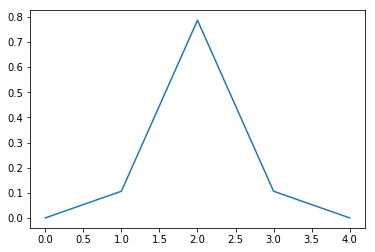

[['Y', 'E', 'H', 'S', 'T', 'V', 'M', 'P', 'N', 'V', 'V', 'G', 'F', 'P', 'Y', 'K', 'A', 'H', 'I', 'E', 'R', 'P', 'G', 'Y', 'S', 'P', 'L', 'T', 'L', 'Q', 'M', 'Q', 'V', 'V', 'E', 'T', 'S', 'L', 'E', 'P', 'T', 'L', 'N', 'L', 'E', 'Y', 'I', 'T', 'C', 'E', 'Y', 'K', 'T', 'V', 'V', 'P', 'S', 'P', 'Y', 'V', 'K', 'C', 'C', 'G', 'A', 'S', 'E', 'C', 'S', 'T', 'K', 'E', 'K', 'P', 'D', 'Y', 'Q', 'C', 'K', 'V', 'Y', 'T', 'G', 'V', 'Y', 'P', 'F', 'M', 'W', 'G', 'G', 'A', 'Y', 'C', 'F', 'C', 'D', 'S', 'E', 'N', 'T', 'Q', 'L', 'S', 'E', 'A', 'Y', 'V', 'D', 'R', 'S', 'D', 'V', 'C', 'R', 'H', 'D', 'H', 'A', 'S', 'A', 'Y', 'K', 'A', 'H', 'T', 'A', 'S', 'L', 'K', 'A', 'K', 'V', 'R', 'V', 'M', 'Y', 'G', 'N', 'V', 'N', 'Q', 'T', 'V', 'D', 'V', 'Y', 'V', 'N', 'G', 'D', 'H', 'A', 'V', 'T', 'I', 'G', 'G', 'T', 'Q', 'F', 'I', 'F', 'G', 'P', 'L', 'S', 'S', 'A', 'W', 'T', 'P', 'F', 'D', 'N', 'K', 'I', 'V', 'V', 'Y', 'K', 'D', 'E', 'V', 'F', 'N', 'Q', 'D', 'F', 'P', 'P', 'Y', 'G', 'S', 'G', 'Q', 'P', 'G', 'R', 'F'

In [5]:
propdict = loadDict('./physicalpropTable.csv')

print('physical properties of amino acids')
print(propdict)

#gaussian smooth to apply physical properties of neighbors to each residue. tuneable kmer?
nGaussian = 5
stdv = .5
window = sig.gaussian(nGaussian, std=stdv)
window /= np.sum(window)
print('gaussian filter for sequence physical props')
plt.plot(window)
plt.show()


hyperparams={'propdict': propdict  , 'Gaussian':window , 'clipfreq':500 }

seqdir = './datasets/classII/'
fastas = glob.glob(seqdir +'*.fasta')


seqIter = dataGen(fastas)
pipeline_functions = [ seq2numpy,  seq2vec , gaussianSmooth, fftall , clipfft , retfinal_first ]
configured = []

for func in pipeline_functions:
    configured.append(functools.partial( func , hyperparams=hyperparams ) )

seq = next(seqIter)
for func in configured:
    seq = func(seq)
    print(seq)

pipeline = compose(reversed(configured))
for i in range(20):
    seq = next(seqIter)
    print(seq)
    res = pipeline(seq)
    print(res)
    print(res.shape)
    

In [4]:
#make the data
#works
import pickle
import random



folders = ['./datasets/truepositive/' , './datasets/truenegative/' ]

#use random uniclust entries as a negative dataset
def iter_sample_fast(iterator, samplesize):
    results = []
    
    # Fill in the first samplesize elements:
    for _ in range(samplesize):
        results.append(next(iterator))
    random.shuffle(results)  # Randomize their positions
    for i, v in enumerate(iterator, samplesize):
        r = random.randint(0, i)
        if r < samplesize:
            results[r] = v  # at a decreasing rate, replace random items

    if len(results) < samplesize:
        raise ValueError("Sample larger than population.")
    return results


uniclust = '/home/cactuskid/DB/uniclust30_2017_10_seed.fasta'
loadRandom = True
negativesamples = 10000

if loadRandom == True:
    print('loading random entries to negative dataset')
    seqIter = dataGen([uniclust] , True )
    randomentries = iter_sample_fast( seqIter , negativesamples)
    SeqIO.write(randomentries, folders[1] + 'rando_uniclust.fasta', "fasta")
    print('done')

datasets = []
for folder in folders:
    #fourier transform all fastas
    print('fourier transform of '+folder)
    fastas = glob.glob(folder +'*.fasta')
    seqIter = dataGen(fastas)
    x = np.array( np.vstack(list(map(pipeline, seqIter ))) )
    #remove nans
    x = x[~np.isnan(x).any(axis=1)]
    y = [ folder ]*(x.shape[0])
    datasets.append( ( x,y) )
    print('DONE')
    
x,y = zip(*datasets)
Xtotal = np.vstack(x)
Ytotal= np.concatenate(y)


print('xmat')
print(Xtotal.shape)
print('ymat')
print(Ytotal.shape)

with open( './xdata.pkl' , 'wb') as handle:
    pickle.dump( Xtotal, handle, -1)

with open( './ydata.pkl' , 'wb') as handle:
    pickle.dump( Ytotal, handle,-1)
    


loading random entries to negative dataset
done
fourier transform of ./datasets/truepositive/
DONE
fourier transform of ./datasets/truenegative/
DONE
xmat
(10536, 6000)
ymat
(10536,)


In [5]:
#learn and validate 
#works

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold , train_test_split
from sklearn.preprocessing import LabelEncoder , robust_scale , normalize
from sklearn.pipeline import Pipeline


# define model. this could probably be a lot fancier... just used out of the box stuff
#isnt overfitting so we can def up the number of layers/nodes
def baseline_model(nlayers ,firstsize, hiddensize,  inputdim, outputdim , modeltype= 'normal' ):
    
    #try convolutional layer?
    #try dropout layer
    
    model = Sequential()
    
    if modeltype == 'convolutional':
        #finish me
        model.add(Conv1D(filters=30 , kernel_size=50 , strides=1, input_shape= ( 1, inputdim) ,  activation='relu'))
    else:
        model.add(Dense(firstsize , input_dim= inputdim  ))

    #added a dropout layer so it would generalize better
    
    model.add(Dropout(.5))

    for i in range(nlayers):
        model.add(Dense(hiddensize ))
    
    
    model.add(Dense(outputdim , activation = 'softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model



with open( './xdata.pkl' , 'rb') as handle:
    X = pickle.load(handle)

with open( './ydata.pkl' , 'rb') as handle:
    Y = pickle.load(handle)
    
#X = robust_scale(X)
X = normalize(X)

np.random.seed(0)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)


nlayers =3
firstsize = 3000
hiddensize = 300
inputdim=X.shape[1] 
outputdim = dummy_y.shape[1]

#output a configured model function with no inputs
retmodel = functools.partial( baseline_model , nlayers , firstsize, hiddensize, inputdim, outputdim , modeltype= 'normal' )    


#set up the problem
estimator = KerasClassifier(build_fn=retmodel, epochs=15, batch_size=15, verbose=1)


Epoch 1/15
8428/8428 [==============================] - 164s 19ms/step - loss: 0.2120 - acc: 0.9357
Epoch 2/15
8428/8428 [==============================] - 136s 16ms/step - loss: 0.1233 - acc: 0.9649
Epoch 3/15
8428/8428 [==============================] - 151s 18ms/step - loss: 0.0928 - acc: 0.9722
Epoch 4/15
8428/8428 [==============================] - 142s 17ms/step - loss: 0.0745 - acc: 0.9816
Epoch 5/15
8428/8428 [==============================] - 131s 16ms/step - loss: 0.0600 - acc: 0.9861
Epoch 6/15
8428/8428 [==============================] - 133s 16ms/step - loss: 0.0484 - acc: 0.9883
Epoch 7/15
8428/8428 [==============================] - 143s 17ms/step - loss: 0.0422 - acc: 0.9891
Epoch 8/15
8428/8428 [==============================] - 150s 18ms/step - loss: 0.0341 - acc: 0.9903
Epoch 9/15
8428/8428 [==============================] - 147s 17ms/step - loss: 0.0276 - acc: 0.9922
Epoch 10/15
8428/8428 [==============================] - 147s 17ms/step - loss: 0.0291 - acc: 0.9923

TypeError: object of type 'NoneType' has no len()

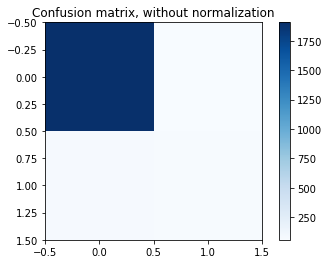

In [6]:

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


kf= KFold(n_splits=5, shuffle=True, random_state=0)

results = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], dummy_y[train], dummy_y[test]
    encoded_Y_train, encoded_Y_test = encoded_Y[train], encoded_Y[test]
    estimator.fit( X_train, y_train)
    y_pred = estimator.predict( X_test)
    
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(encoded_Y_test, y_pred)
    results.append(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(results[0], classes=folders.reverse() ,
                      title='Confusion matrix, without normalization')
    
    plt.show()

    plt.figure()

    plot_confusion_matrix(results[0], classes=folders.reverse() , normalize = True )

    plt.show()
    

